## 5-2 熊貓是 Python 的 Excel

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

In [ ]:
%ls

sample_data/


In [ ]:
df=pd.read_csv("grades.csv")

In [ ]:
df.head()

In [ ]:
df["國文"] #找出國文的成績

In [ ]:
df.國文

In [ ]:
cg=df.國文.values #轉換dataframe單項資料成array，也可以寫成df["國文"].values

In [ ]:
cg

In [ ]:
cg.means() #取平均

In [ ]:
cg.std() #標準差

In [ ]:
df.國文.plot()

In [ ]:
df.國文.hist(bins=15) #畫單項資料直方圖的方法 df.項目名稱.hist(bins=區分區間)

## 5-3 用熊貓做基本數據分析

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df=pd.read_csv("grades.csv")

In [ ]:
df.head()

In [ ]:
df.國文.mean()

In [ ]:
df.std()

In [ ]:
df.describe() #將基本數據都算出來

In [ ]:
df.corr() #算所有相關係數

In [ ]:
df.國文.corr(df.數學)

In [ ]:
df["總級分"]=df[["國文","英文","數學","社會","自然"]].sum(1) #新增一個總和的欄位

In [ ]:
df.head()

In [ ]:
df["主科"]=df.數學*1.5+df.英文

In [ ]:
df.mean()

In [ ]:
df.sort.values(by="總級分",ascending=False).head(20) #由大到小排序
df.sort.values(by="總級分").head(20) #由小到大

In [ ]:
df.sort_values(by=["主科","總級分"], ascending=False).head(20) #多項進行排列，先用主科排再用總級分排

## 5-4 組裝自己的 DataFrame

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
mydata=np.random.randn(4,3)

In [ ]:
mydata

array([[ 0.28119409,  0.16971402,  0.71549456],
       [ 0.0747035 , -0.01562061, -2.42712517],
       [-0.61750864,  0.14481682,  1.23239105],
       [ 0.44846414, -0.4152468 ,  2.57445344]])

In [ ]:
list("ABCDE")

['A', 'B', 'C', 'D', 'E']

In [ ]:
list("甲乙丙丁")

['甲', '乙', '丙', '丁']

In [ ]:
df1=pd.DataFrame(mydata,columns=list("ABC"))

In [ ]:
df1

,A,B,C
0,0.281194,0.169714,0.715495
1,0.074704,-0.015621,-2.427125
2,-0.617509,0.144817,1.232391
3,0.448464,-0.415247,2.574453


In [ ]:
df2=pd.DataFrame(np.random.randn(3,3),columns=list("ABC"))

In [ ]:
df2

,A,B,C
0,0.273031,0.405398,0.009096
1,0.879196,0.344253,-0.719745
2,1.134427,0.908960,1.203785


In [ ]:
df3=pd.concat([df1,df2],axis=0) #合併dataframe，從行的方向合併永遠都是先列後行

In [ ]:
df3

,A,B,C
0,0.281194,0.169714,0.715495
1,0.074704,-0.015621,-2.427125
2,-0.617509,0.144817,1.232391
3,0.448464,-0.415247,2.574453
0,0.273031,0.405398,0.009096
1,0.879196,0.344253,-0.719745
2,1.134427,0.908960,1.203785


In [ ]:
df3.index=range(7)

In [ ]:
df3

,A,B,C
0,0.281194,0.169714,0.715495
1,0.074704,-0.015621,-2.427125
2,-0.617509,0.144817,1.232391
3,0.448464,-0.415247,2.574453
4,0.273031,0.405398,0.009096
5,0.879196,0.344253,-0.719745
6,1.134427,0.908960,1.203785


In [ ]:
df4=pd.concat([df1,df2],axis=1) #從行的方向合併

In [ ]:
df4

,A,B,C,A,B,C
0,0.281194,0.169714,0.715495,0.273031,0.405398,0.009096
1,0.074704,-0.015621,-2.427125,0.879196,0.344253,-0.719745
2,-0.617509,0.144817,1.232391,1.134427,0.908960,1.203785
3,0.448464,-0.415247,2.574453,NaN,NaN,NaN


## 5-5 用 Groupby 找到美國最常目擊 UFO 的州

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv("https://bit.ly/uforeports")

In [3]:
df.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [4]:
df_state=df.groupby("State").count() #依項目集合直

In [5]:
df_state

,City,Colors Reported,Shape Reported,Time
State,,,,
AK,116,25,99,116
AL,193,21,173,193
AR,206,26,186,206
AZ,736,145,644,738
CA,2525,457,2148,2529
CO,367,60,322,367
CT,225,25,188,225
Ca,1,0,1,1
DE,43,5,38,43


In [ ]:
df_state.sort_values(by="Time",ascending=False)

In [ ]:
df_state.sort_values(by="Time",ascending=False, inplace=True) #直接取代裡面的資料

In [ ]:
df_state.head(10)

,City,Colors Reported,Shape Reported,Time
State,,,,
CA,2525,457,2148,2529
WA,1320,269,925,1322
TX,1025,138,923,1027
NY,913,123,823,914
FL,835,120,727,837
AZ,736,145,644,738
OH,665,93,605,667
IL,612,112,540,613
PA,598,97,519,598


<Axes: xlabel='State'>

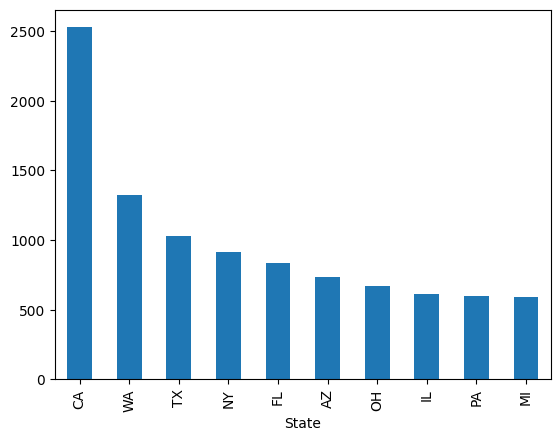

In [ ]:
df_state[:10].Time.plot(kind='bar')

## 5-6 Pandas 的 loc 定位法

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df=pd.DataFrame(np.random.randn(5,3),
                index=list(range(1,6)),
                columns=list("ABC"))

In [ ]:
df

,A,B,C
1,-1.342002,-0.436338,1.827655
2,-0.993690,-1.070282,0.547855
3,-2.019663,-0.055126,0.931534
4,-1.783714,0.971918,-0.142506
5,-0.263965,-0.648993,-1.513579


In [ ]:
df[df.B>0]

,A,B,C
4,-1.783714,0.971918,-0.142506


In [ ]:
df[df.B>0]["C"]=0

<ipython-input-42-c570c9f25749>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.B>0]["C"]=0


In [ ]:
df.loc[2:3,"B":"C"]

,B,C
2,-1.070282,0.547855
3,-0.055126,0.931534


In [ ]:
df.loc[2,"B"]

-1.0702820867773164

In [ ]:
df.loc[2,"B"]=1

In [ ]:
df

,A,B,C
1,-1.342002,-0.436338,1.827655
2,-0.993690,1.000000,0.547855
3,-2.019663,-0.055126,0.931534
4,-1.783714,0.971918,-0.142506
5,-0.263965,-0.648993,-1.513579


In [ ]:
df.loc[df.B>0,"C"]=0

In [ ]:
df

,A,B,C
1,-1.342002,-0.436338,1.827655
2,-0.993690,1.000000,0.000000
3,-2.019663,-0.055126,0.931534
4,-1.783714,0.971918,0.000000
5,-0.263965,-0.648993,-1.513579


## 5-7 玩玩真的股票資料

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
pip install pandas-datareader

In [ ]:
import pandas_datareader.data as web

In [ ]:
df=web.DataReader("AAPL","yahoo",start="2012-9-1",end="2017-8-31")

TypeError: ignored

In [ ]:
P=df["Adj Close"]

In [ ]:
P.head()

In [ ]:
P.plot()

In [ ]:
r=P.diff()/P #計算報酬率

In [ ]:
r[-100:].plot()

In [ ]:
P.rolling(window=20).mean()

In [ ]:
P.plot()
P.rolling(window=20).mean().plot()
P.rolling(window=60).mean().plot()